<a href="https://colab.research.google.com/github/shobharanip/10-Deep-Learning-Methods-AI-Practitioners-_Shobha/blob/master/BDA_Final_Slide_deck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PricePrecision: Gaining Insights into Car Prices through Big Data**

In [ ]:
# Install the requests library using pip, a package manager for Python
! pip install requests
# Install the aiohttp library, an asynchronous HTTP client/server framework
! pip install aiohttp

In [ ]:
# Install a specific version (or higher) of the fsspec library, which is used for file system interfaces
! pip install 'fsspec>=0.3.3'

In [ ]:
# Import necessary libraries for data analysis and manipulation
import pandas as pd  # Pandas library for data manipulation and analysis
import seaborn as sns  # Seaborn library for making statistical graphics
import matplotlib.pyplot as plt  # Matplotlib's pyplot for plotting
import numpy as np  # NumPy library for large, multi-dimensional arrays and matrices
import dask.dataframe as dd  # Dask library for parallel computing with DataFrame structures

In [ ]:
# Import various utilities and models from other libraries
from datetime import datetime  # Import datetime to handle date and time data
from pyarrow import parquet as pq  # Import pyarrow for handling Parquet files, a columnar storage format
from dask.diagnostics import ProgressBar  # Import ProgressBar to visualize the computation process in Dask
from matplotlib import pyplot as plt  # Redundant import of pyplot, can be removed since it's already imported above
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor for regression tasks
from sklearn.model_selection import train_test_split  # Import function to split data into train and test sets
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Import metrics to evaluate regression models
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder to convert categorical variables into a binary vector


In [ ]:
# Mount Google Drive to access files stored there, specific to Google Colab environments
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Load a dataset using Dask; similar to pandas but allows for out-of-core (larger-than-memory) computations
df = dd.read_csv('car_prices.csv')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mileage),color,interior,seller,mmr,sellingprice,saledate
npartitions=1,,,,,,,,,,,,,,,,
,int64,string,string,string,string,string,string,string,float64,int64,string,string,string,int64,int64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
# Cleaning the Dataset
# This might include dropping duplicates, handling missing values, etc.
df = df.drop_duplicates()
# Or other methods to handle missing values
df = df.dropna()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mileage),color,interior,seller,mmr,sellingprice,saledate
npartitions=1,,,,,,,,,,,,,,,,
,int64,string,string,string,string,string,string,string,float64,int64,string,string,string,int64,int64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
import dask.dataframe as dd

# Load CSV using Dask, specifying the dtype for "odometer (mileage)"
df = dd.read_csv('car_prices.csv', dtype={'odometer (mileage)': 'float64'})

# If using Parquet, ensure consistent string encoding (e.g., UTF-8) during data loading/saving
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mileage),color,interior,seller,mmr,sellingprice,saledate
npartitions=1,,,,,,,,,,,,,,,,
,int64,string,string,string,string,string,string,string,float64,float64,string,string,string,int64,int64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
import pandas as pd

# Construct the data dictionary without including data types
data_dictionary = {
    'Variable': [
        'year',
        'make',
        'model',
        'trim',
        'body',
        'transmission',
        'vin',
        'state',
        'condition',
        'odometer (mileage)',
        'color',
        'interior',
        'seller',
        'mmr',
        'sellingprice',
        'saledate'
    ],
    'Description': [
        'Year the car was manufactured',
        'Brand of the car',
        'Model of the car',
        'Trim level of the car model',
        'Body style of the car',
        'Type of transmission in the car',
        'Vehicle Identification Number',
        'US state where the car is being sold',
        'Condition rating of the car, higher numbers indicating better condition',
        'Total distance the car has been driven, in miles',
        'Exterior color of the car',
        'Interior color of the car',
        'Entity or individual selling the car',
        'Market reference price for the car',
        'Price at which the car was sold',
        'Date and time of the sale'
    ]
}

# Convert the dictionary to a DataFrame for display
data_dictionary_df = pd.DataFrame(data_dictionary)

# Display the data dictionary
data_dictionary_df

,Variable,Description
0,year,Year the car was manufactured
1,make,Brand of the car
2,model,Model of the car
3,trim,Trim level of the car model
4,body,Body style of the car
5,transmission,Type of transmission in the car
6,vin,Vehicle Identification Number
7,state,US state where the car is being sold
8,condition,"Condition rating of the car, higher numbers in..."
9,odometer (mileage),"Total distance the car has been driven, in miles"


1. Cleaning and Transforming DataFrames

In [ ]:
#Implicitly set the datatypes when reading the csv files#
# This DataFrame is designed to handle large datasets that do not fit into memory
# Compute the entire DataFrame to convert it to a pandas DataFrame
# Note: Only do this if the DataFrame fits into memory, otherwise consider using other strategies like batch processing
df = df.compute()

In [ ]:
# Check the shape of the data
# This prints out the number of rows and columns in the DataFrame
# `df.shape[0]` accesses the number of rows, and `len(df.columns)` accesses the number of columns
print("Shape of the dataset:", df.shape[0], "rows and", len(df.columns), "columns")

Shape of the dataset: 558837 rows and 16 columns


In [ ]:
import pandas as pd

# Calculate the total non-missing values for each column
non_missing_values = df.count()

# Calculate the missing values for each column
missing_values = df.isnull().sum()

# Create a DataFrame from the counts
count_summary = pd.DataFrame({
    'Column': df.columns,                    # Column names
    'Non-Missing Values': non_missing_values,  # Non-missing values count
    'Missing Values': missing_values          # Missing values count
}).set_index('Column')  # Setting the column names as index for better readability

# Print the DataFrame to display it in a table format
print(count_summary)


                    Non-Missing Values  Missing Values
Column                                                
year                            558837               0
make                            548536           10301
model                           548438           10399
trim                            548186           10651
body                            545642           13195
transmission                    493480           65357
vin                             558837               0
state                           558837               0
condition                       547043           11794
odometer (mileage)              558743              94
color                           558088             749
interior                        558088             749
seller                          558837               0
mmr                             558837               0
sellingprice                    558837               0
saledate                        558837               0


In [ ]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

year                      0
make                  10301
model                 10399
trim                  10651
body                  13195
transmission          65357
vin                       0
state                     0
condition             11794
odometer (mileage)       94
color                   749
interior                749
seller                    0
mmr                       0
sellingprice              0
saledate                  0
dtype: int64


In [ ]:
# Filter to only show columns with missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

make                  10301
model                 10399
trim                  10651
body                  13195
transmission          65357
condition             11794
odometer (mileage)       94
color                   749
interior                749
dtype: int64


In [ ]:
# Drop the 'vin' column as it's unique to each car and not useful for modeling
df.drop('vin', axis=1, inplace=True)

In [ ]:
# For categorical columns: 'make'
# Fill missing values in 'make' with the most common value (the mode)
df['make'] = df['make'].fillna(df['make']a.mode()[0])
# After filling missing values, count the remaining nulls in the 'make' column (should be 0)
missing_values_column_after = df['make'].isnull().sum()
# Print the count of missing values in 'make' to verify they have been filled
print(f"Missing values in 'make' after filling: {missing_values_column_after}")

Missing values in 'make' after filling: 0


In [ ]:
# For categorical columns: 'transmission'
# Replace missing values in the 'transmission' column with 'most_common_transmission'
# Note: 'most_common_transmission' should be defined based on the data analysis; here it is used as a placeholder
df['transmission'] = df['transmission'].fillna('most_common_transmission')
# After filling missing values, count the remaining nulls in the 'transmission' column (should be 0)
missing_values_column_after = df['transmission'].isnull().sum()
# Print the count of missing values in 'transmission' to verify they have been filled
print(f"Missing values in 'transmission' after filling: {missing_values_column_after}")

Missing values in 'transmission' after filling: 0


In [ ]:
# For numerical columns: 'odometer (mileage)'
# Use linear interpolation to fill missing values in 'odometer (mileage)' based on surrounding values
# This assumes a linear relationship between the values adjacent to the missing data
df['odometer (mileage)'] = df['odometer (mileage)'].interpolate(method='linear')
# After interpolation, count the remaining nulls in the 'odometer (mileage)' column (should be 0 unless there are leading/trailing NaNs)
missing_values_column_after = df['odometer (mileage)'].isnull().sum()
# Print the count of missing values in 'odometer (mileage)' to verify they have been filled
print(f"Missing values in 'odometer (mileage)' after filling: {missing_values_column_after}")

Missing values in 'odometer (mileage)' after filling: 0


In [ ]:
import pandas as pd

# Fill missing values for categorical columns (model, trim, body, color, interior)
# Use the most frequent value (mode) for categorical data
categorical_columns = ['model', 'trim', 'body', 'color', 'interior']
for column in categorical_columns:
    if column in df.columns:
        # Using the mode to fill, mode()[0] to get the first mode in case of multiple modes
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        print(f"Column {column} does not exist in the DataFrame.")

In [ ]:
# This will create a new DataFrame without any columns that have missing values
df_no_missing_values = df.loc[:, df.isnull().sum() == 0]
# This will give you a list of columns that don't have any missing values
columns_without_missing_values = df.columns[df.isnull().sum() == 0]
print(columns_without_missing_values)

Index(['year', 'make', 'transmission', 'vin', 'state', 'odometer (mileage)',
       'seller', 'mmr', 'sellingprice', 'saledate'],
      dtype='object')


In [ ]:
# Filter to only show columns with missing values
# Check for missing values
missing_values1 = df.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
print(missing_values1)

Series([], dtype: int64)


In [ ]:
# Check for missing values across all columns
missing_values = df.isnull().sum()

# Filter to only show columns without missing values (where the count of missing values is 0)
not_missing_values = missing_values[missing_values == 0]

# Print the columns that do not have any missing values
print(not_missing_values)

year                  0
make                  0
model                 0
trim                  0
body                  0
transmission          0
state                 0
condition             0
odometer (mileage)    0
color                 0
interior              0
seller                0
mmr                   0
sellingprice          0
saledate              0
sale_year             0
sale_month            0
sale_day              0
dtype: int64


In [ ]:
# Feature Engineering
# Before converting the 'saledate' column to datetime, let's remove the timezone
# information since it's not consistent (PST and PDT)
df['saledate'] = df['saledate'].str.replace(r" GMT-0800 \(PST\)", "", regex=True)
print(df['saledate'].head(5))

0    Tue Dec 16 2014 12:30:00
1    Tue Dec 16 2014 12:30:00
2    Thu Jan 15 2015 04:30:00
3    Thu Jan 29 2015 04:30:00
4    Thu Dec 18 2014 12:30:00
Name: saledate, dtype: string


In [ ]:
# Check the length of the DataFrame
print("Length of the DataFrame:", len(df))
# Assuming you have a Series or list you're trying to assign to 'saledate'
saledate_values = pd.to_datetime(df['saledate'], format='%a %b %d %Y %H:%M:%S', errors='coerce')
print(df['saledate'].head(5))

Length of the DataFrame: 558837
0    Tue Dec 16 2014 12:30:00
1    Tue Dec 16 2014 12:30:00
2    Thu Jan 15 2015 04:30:00
3    Thu Jan 29 2015 04:30:00
4    Thu Dec 18 2014 12:30:00
Name: saledate, dtype: string


In [ ]:
# Check the initial data type and the format of the first few entries
print("Data type before conversion:", df['saledate'].dtype)
print(df['saledate'].head())

# If the 'saledate' column is not of string type, convert it to string
if df['saledate'].dtype != 'object':  # 'object' typically means string in pandas DataFrame
    df['saledate'] = df['saledate'].astype(str)

# Apply regex replacement to remove the timezone information
df['saledate'] = df['saledate'].str.replace(r" GMT-[0-9]{4} \(.*\)", "", regex=True)
# Attempt to convert 'saledate' to datetime format without coercing errors
df['saledate'] = pd.to_datetime(df['saledate'], format='%a %b %d %Y %H:%M:%S', errors='raise')
# Now extract the year, month, and day of the week
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_day'] = df['saledate'].dt.dayofweek

# Print the first 5 entries after conversion
print(df['saledate'].head())

Data type before conversion: string
0    Tue Dec 16 2014 12:30:00
1    Tue Dec 16 2014 12:30:00
2    Thu Jan 15 2015 04:30:00
3    Thu Jan 29 2015 04:30:00
4    Thu Dec 18 2014 12:30:00
Name: saledate, dtype: string
0   2014-12-16 12:30:00
1   2014-12-16 12:30:00
2   2015-01-15 04:30:00
3   2015-01-29 04:30:00
4   2014-12-18 12:30:00
Name: saledate, dtype: datetime64[ns]


In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,year,condition,odometer (mileage),mmr,sellingprice,sale_year,sale_month,sale_day
0,2015,5.0,16639.0,20500,21500,2014,12,1
1,2015,5.0,9393.0,20800,21500,2014,12,1
2,2014,4.5,1331.0,31900,30000,2015,1,3
3,2015,4.1,14282.0,27500,27750,2015,1,3
4,2014,4.3,2641.0,66000,67000,2014,12,3
...,...,...,...,...,...,...,...,...
558832,2015,4.5,18255.0,35300,33000,2015,7,3
558833,2012,5.0,54393.0,30200,30800,2015,7,2
558834,2012,4.8,50561.0,29800,34000,2015,7,2
558835,2015,3.8,16658.0,15100,11100,2015,7,3


In [ ]:
print(df.head(2))

   year make    model trim body transmission state  condition  \
0  2015  Kia  Sorento   LX  SUV    automatic    ca        5.0   
1  2015  Kia  Sorento   LX  SUV    automatic    ca        5.0   

   odometer (mileage)  color interior                   seller    mmr  \
0             16639.0  white    black  kia motors america, inc  20500   
1              9393.0  white    beige  kia motors america, inc  20800   

   sellingprice            saledate  sale_year  sale_month  sale_day  
0         21500 2014-12-16 12:30:00       2014          12         1  
1         21500 2014-12-16 12:30:00       2014          12         1  


In [ ]:
# Compute correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,condition,odometer (mileage),mmr,sellingprice,sale_year,sale_month,sale_day
year,1.000000,0.551232,-0.772748,0.596601,0.586459,0.114314,-0.046689,0.045325
condition,0.551232,1.000000,-0.538842,0.485026,0.538774,0.035861,-0.014469,0.059668
odometer (mileage),-0.772748,-0.538842,1.000000,-0.588149,-0.582436,-0.086819,0.041047,-0.071553
mmr,0.596601,0.485026,-0.588149,1.000000,0.983632,0.073239,-0.024576,0.083330
sellingprice,0.586459,0.538774,-0.582436,0.983632,1.000000,0.076982,-0.029430,0.084354
sale_year,0.114314,0.035861,-0.086819,0.073239,0.076982,1.000000,-0.823229,0.031289
sale_month,-0.046689,-0.014469,0.041047,-0.024576,-0.029430,-0.823229,1.000000,-0.008213
sale_day,0.045325,0.059668,-0.071553,0.083330,0.084354,0.031289,-0.008213,1.000000


In [ ]:
# Identify 2-3 different correlations
correlations = correlation_matrix['sellingprice'].sort_values(ascending=False)
correlations

sellingprice          1.000000
mmr                   0.983632
year                  0.586459
condition             0.538774
sale_day              0.084354
sale_year             0.076982
sale_month           -0.029430
odometer (mileage)   -0.582436
Name: sellingprice, dtype: float64

In [ ]:
# Correlations
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Now compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation with 'sellingprice', sorted descending
print(correlation_matrix[['sellingprice']].sort_values(by='sellingprice', ascending=False))

                    sellingprice
sellingprice            1.000000
mmr                     0.983632
year                    0.586459
condition               0.538774
sale_day                0.084354
sale_year               0.076982
sale_month             -0.029430
odometer (mileage)     -0.582436


**Feature Engineering for Hypotheses**

In [ ]:
import pandas as pd
# Hypothesis 1: Fuel Efficiency vs. Price
# For Hypothesis 2: define a list of luxury brands for comparison.
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus']  # Add or remove brands as needed.
# Adjusting the lambda function to explicitly handle NA values
df['is_luxury'] = df['make'].apply(lambda x: 'Luxury' if not pd.isna(x) and x in luxury_brands else 'Non-Luxury')
# For Hypothesis 3, derive car age from the model year
current_year = pd.Timestamp.now().year
df['car_age'] = current_year - df['year']

In [ ]:
print(df.head(5))

   year   make                model        trim   body transmission state  \
0  2015    Kia              Sorento          LX    SUV    automatic    ca   
1  2015    Kia              Sorento          LX    SUV    automatic    ca   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic    ca   
3  2015  Volvo                  S60          T5  Sedan    automatic    ca   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic    ca   

   condition  odometer (mileage)  color interior  \
0        5.0             16639.0  white    black   
1        5.0              9393.0  white    beige   
2        4.5              1331.0   gray    black   
3        4.1             14282.0  white    black   
4        4.3              2641.0   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, inc  20800         21500   
2  financial services rema

In [ ]:
print(df.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer (mileage)', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'sale_year', 'sale_month', 'sale_day',
       'is_luxury', 'car_age'],
      dtype='object')


**Visualization and Analysis**
Hypothesis 1: Fuel Efficiency vs. Price

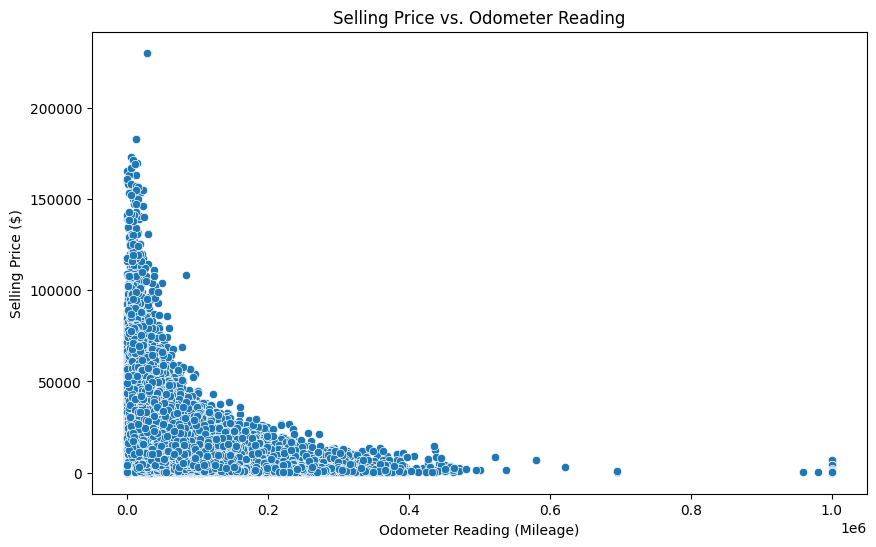

Correlation coefficient between odometer reading and selling price: -0.58243607658479


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between odometer reading and selling price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer (mileage)', y='sellingprice', data=df)
plt.title('Selling Price vs. Odometer Reading')
plt.xlabel('Odometer Reading (Mileage)')
plt.ylabel('Selling Price ($)')
plt.show()
# Calculating correlation coefficient
correlation_coefficient = df['odometer (mileage)'].corr(df['sellingprice'])
print(f"Correlation coefficient between odometer reading and selling price: {correlation_coefficient}")

**Hypothesis 2:** Luxury vs. Non-Luxury Brand Prices

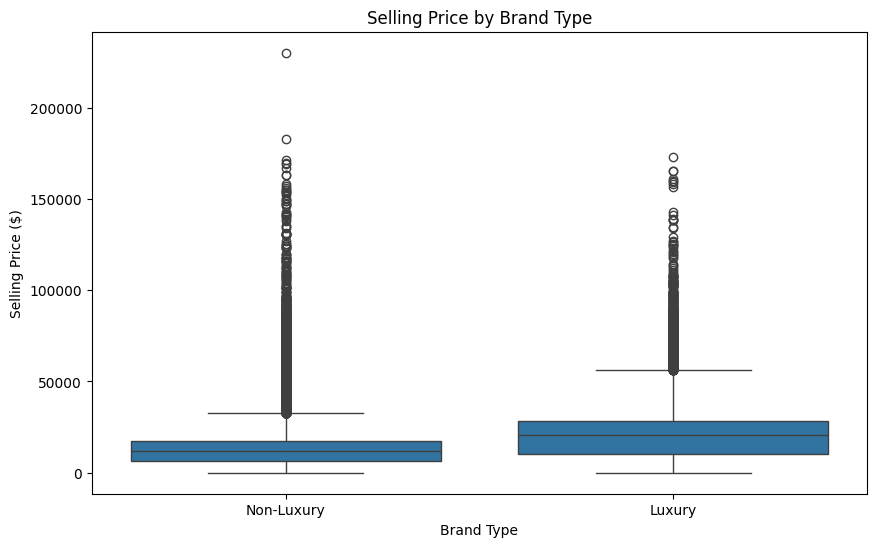

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing selling price by luxury status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_luxury', y='sellingprice', data=df)
plt.title('Selling Price by Brand Type')
plt.xlabel('Brand Type')
plt.ylabel('Selling Price ($)')
plt.show()


**Hypothesis 3:** Car Age vs. Price

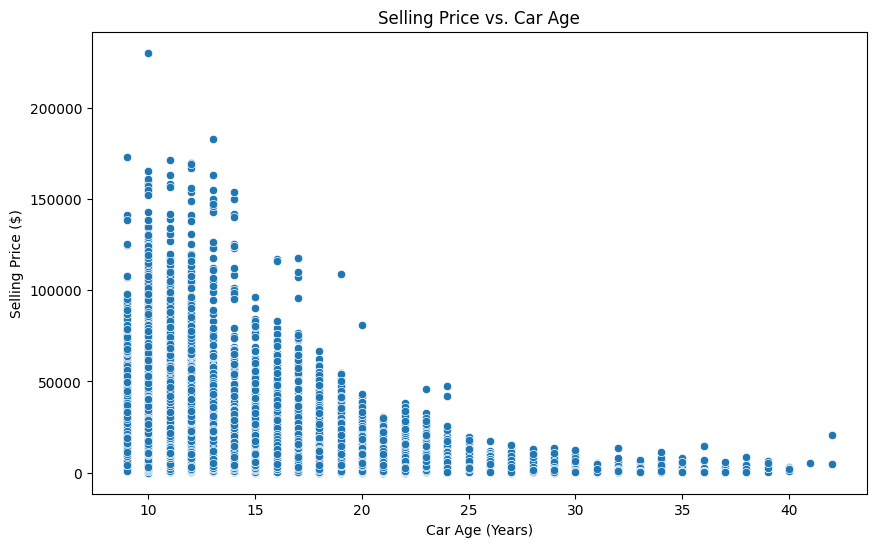

In [ ]:
# Assuming car_age has been calculated correctly as current year - year of the car
plt.figure(figsize=(10, 6))
sns.scatterplot(x='car_age', y='sellingprice', data=df)
plt.title('Selling Price vs. Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Selling Price ($)')
plt.show()


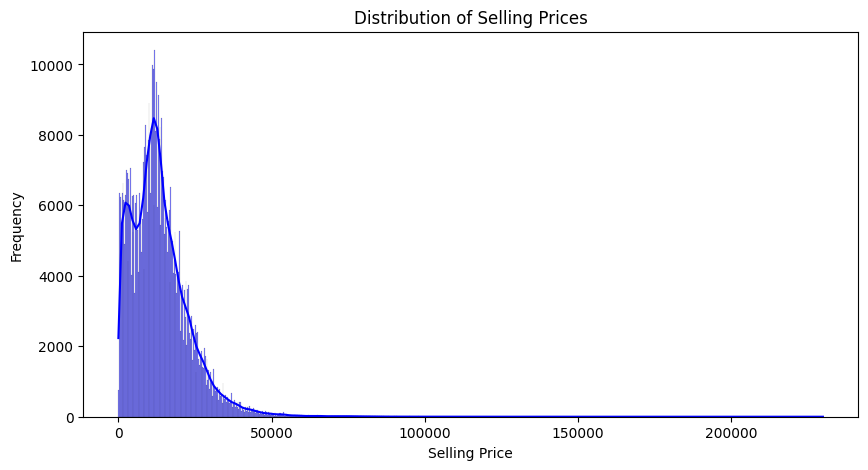

In [ ]:
# Univariate Visualization
# Visualization 1: of Selling Prices (Distribution)
plt.figure(figsize=(10, 5))
sns.histplot(df['sellingprice'], kde=True, color='blue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


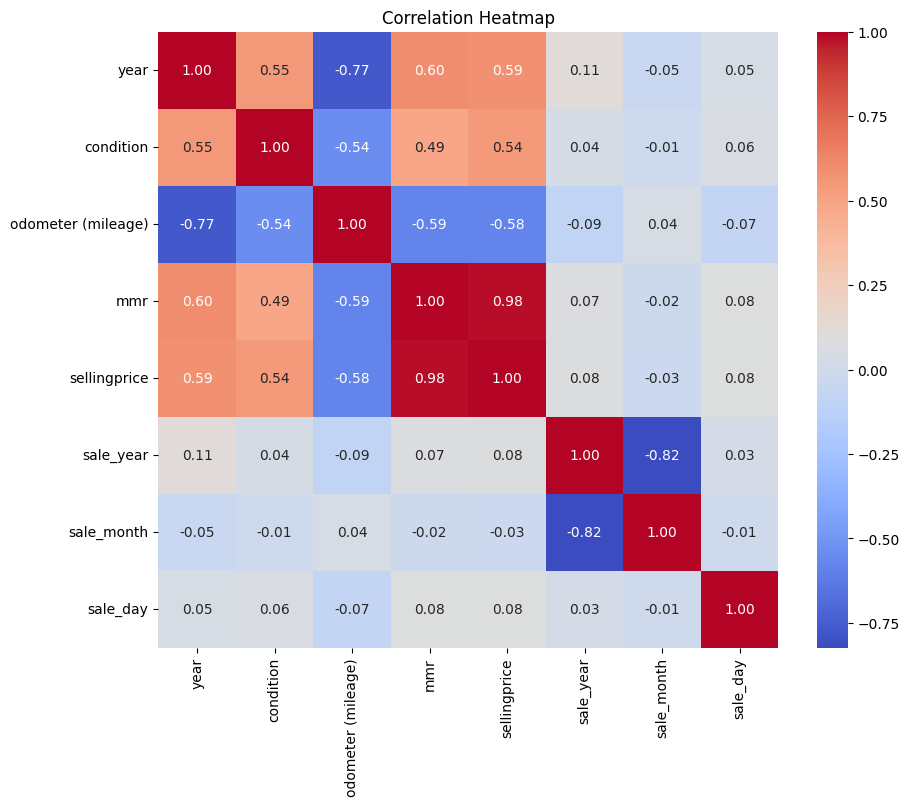

In [ ]:
# Visualization 2: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

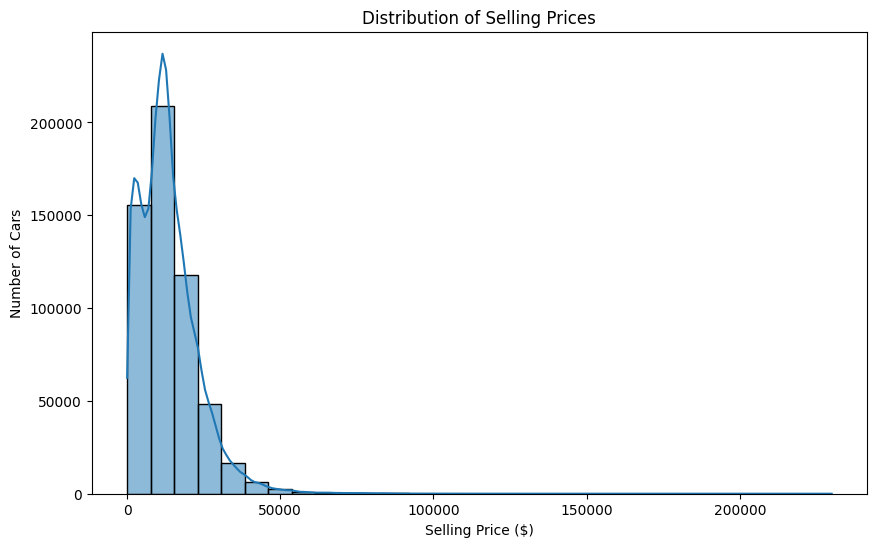

In [ ]:
# Visualization 3: Distribution vs Number of Cars
# Comment: This histogram shows the frequency distribution of car selling prices, providing insights into the most common price ranges and potential outliers.

plt.figure(figsize=(10, 6))
sns.histplot(df['sellingprice'], bins=30, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price ($)')
plt.ylabel('Number of Cars')
plt.show()

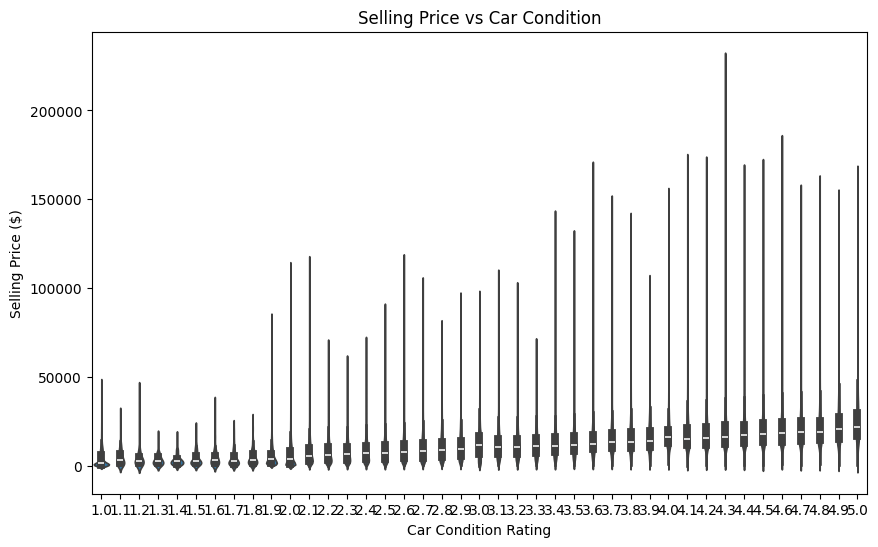

In [ ]:
# Visualization 4 : Price vs Condition
plt.figure(figsize=(10, 6))
sns.violinplot(x='condition', y='sellingprice', data=df)
plt.title('Selling Price vs Car Condition')
plt.xlabel('Car Condition Rating')
plt.ylabel('Selling Price ($)')
plt.show()


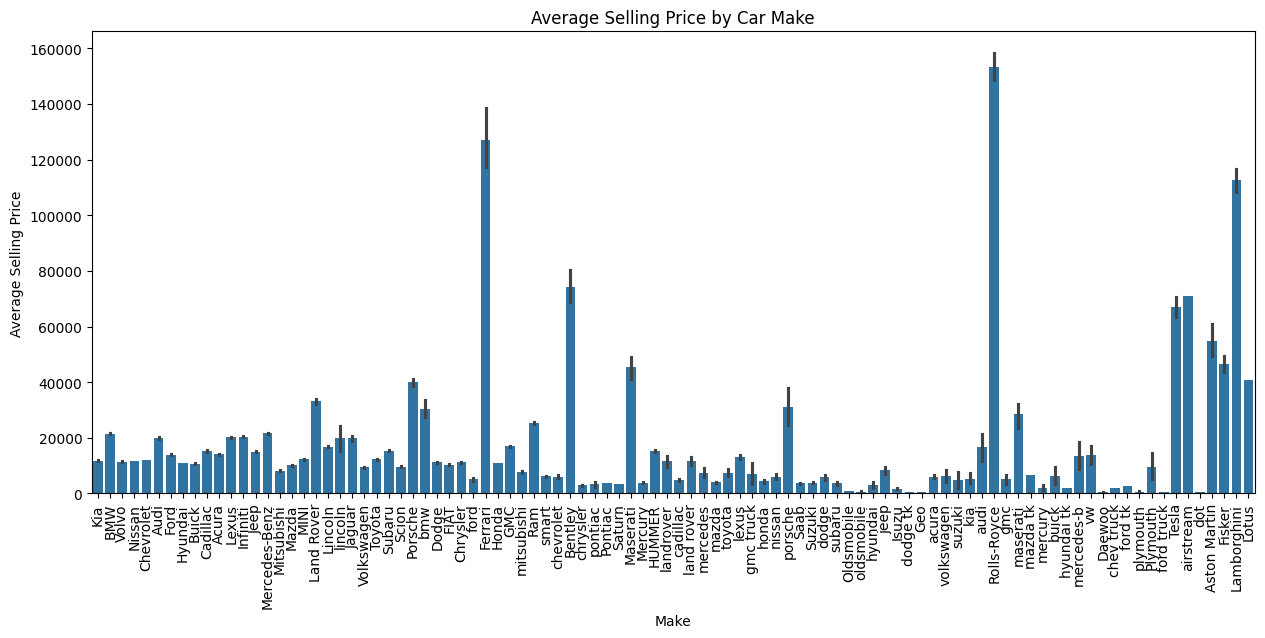

In [ ]:
# Visualization 5: Average Selling Price by Car Make
# Comment: This bar chart compares the average selling price across different car makes, highlighting which brands command higher prices on average.
plt.figure(figsize=(15, 6))
sns.barplot(x='make', y='sellingprice', data=df, estimator=np.mean)
plt.title('Average Selling Price by Car Make')
plt.xlabel('Make')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.show()

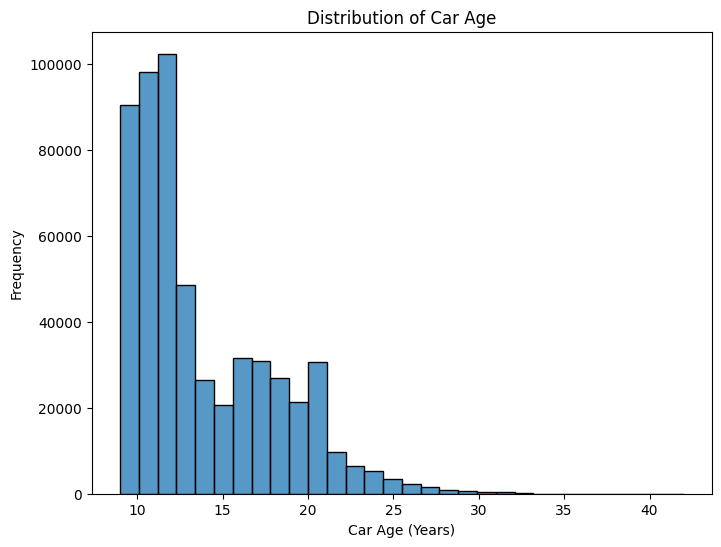

In [ ]:
# Visualization 6: Distribution of Car Age
plt.figure(figsize=(8, 6))
sns.histplot(df['car_age'], bins=30)
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Frequency')
plt.show()

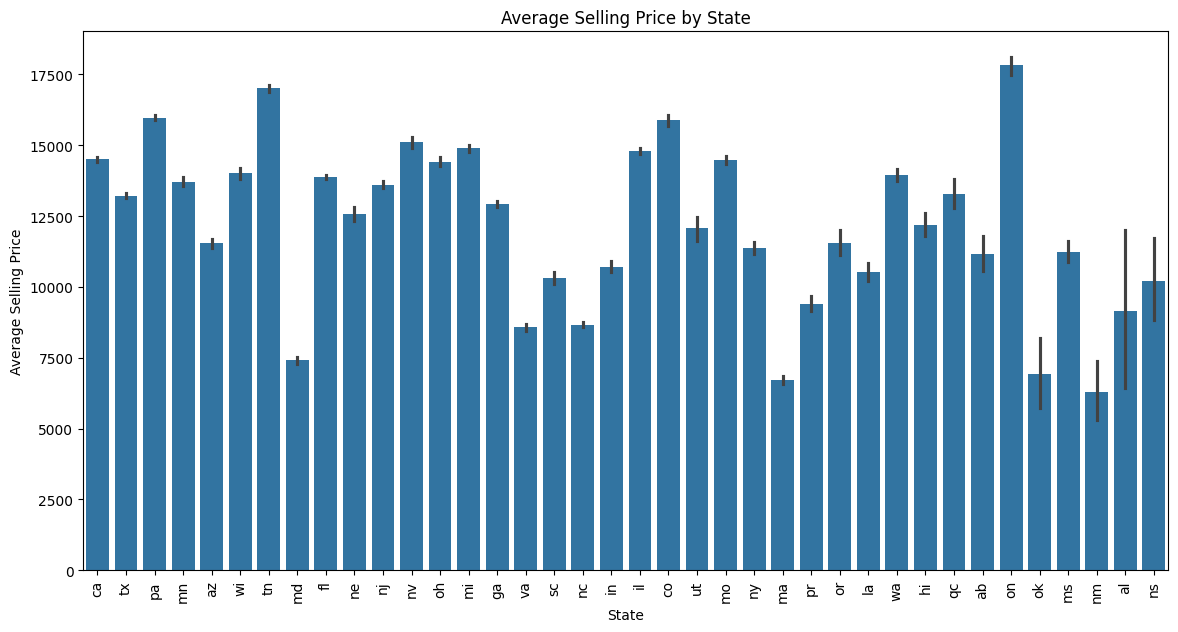

In [ ]:
# Visualization 7: Price by State
plt.figure(figsize=(14, 7))
sns.barplot(y='sellingprice', x='state', data=df, estimator=np.mean)
plt.title('Average Selling Price by State')
plt.xlabel('State')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.show()

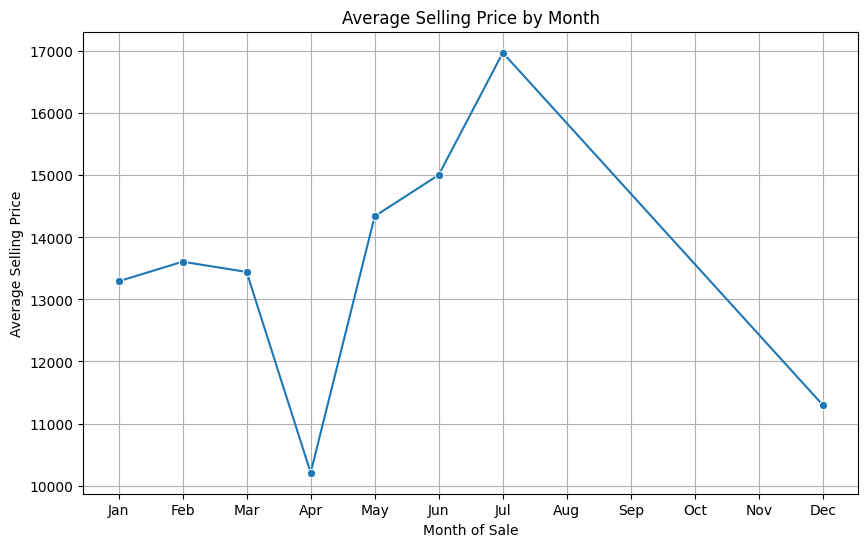

In [ ]:
# # Visualization 8: Calculate the average selling prices by month
monthly_avg_prices = df.groupby('sale_month')['sellingprice'].mean().reset_index()

# Plotting the average selling prices by month using a line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_prices, x='sale_month', y='sellingprice', marker='o')  # Using marker='o' to mark each data point
plt.title('Average Selling Price by Month')
plt.xlabel('Month of Sale')
plt.ylabel('Average Selling Price')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Ensure proper month labeling
plt.grid(True)  # Adding a grid for better readability of the plot
plt.show()


<ipython-input-73-8dff46d0eb44>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='transmission', y='sellingprice', data=df, ci=None) # ci=None will remove the error bars


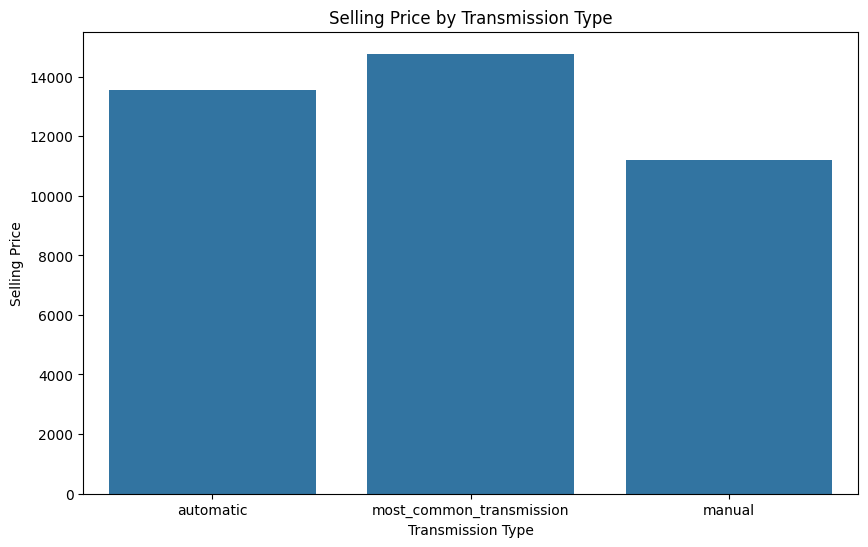

In [ ]:
# # # Visualization 9: Selling Price by Transmission Type

plt.figure(figsize=(10, 6))
sns.barplot(x='transmission', y='sellingprice', data=df, ci=None) # ci=None will remove the error bars
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

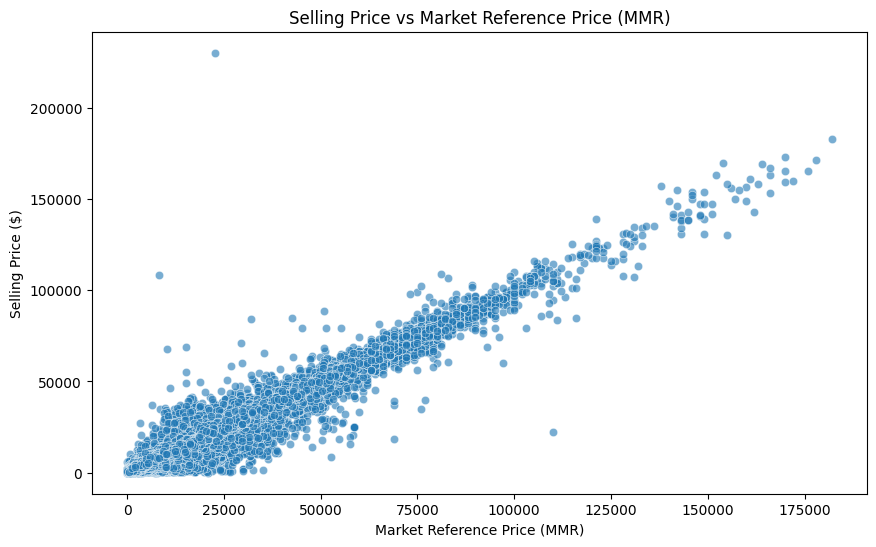

In [ ]:
# Visualization 10: Selling Price vs. MMR (Market Reference Price)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mmr', y='sellingprice', data=df, alpha=0.6)
plt.title('Selling Price vs Market Reference Price (MMR)')
plt.xlabel('Market Reference Price (MMR)')
plt.ylabel('Selling Price ($)')
plt.show()


<ipython-input-63-9cdefeb69764>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='color', y='sellingprice', hue='condition', data=df, ci=None)


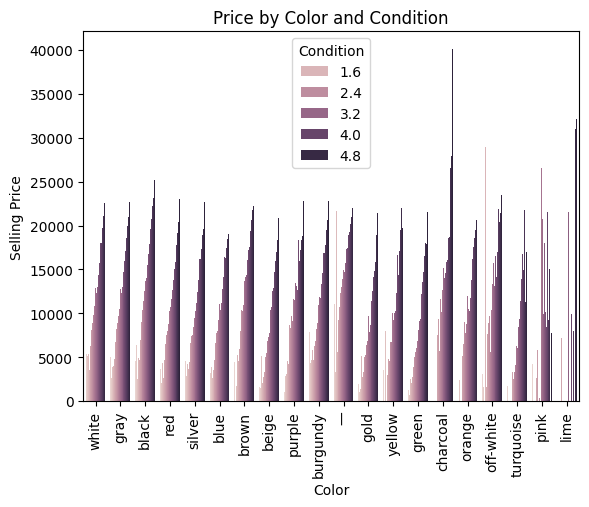

In [ ]:
# Visualization 11: Price by Color and Condition
# Comment: This grouped bar chart allows us to compare the average selling prices of cars by color, further broken down by condition, offering a nuanced look at how these factors interact.
sns.barplot(x='color', y='sellingprice', hue='condition', data=df, ci=None)
plt.title('Price by Color and Condition')
plt.xlabel('Color')
plt.ylabel('Selling Price')
plt.legend(title='Condition')
plt.xticks(rotation=90)
plt.show()

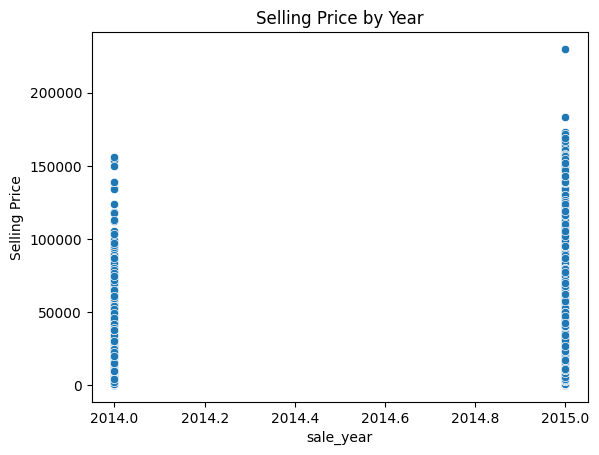

In [ ]:
# Visualization 12: Selling Price by Year
sns.scatterplot(x='sale_year', y='sellingprice', data=df)
plt.title('Selling Price by Year')
plt.xlabel('sale_year')
plt.ylabel('Selling Price')
plt.show()

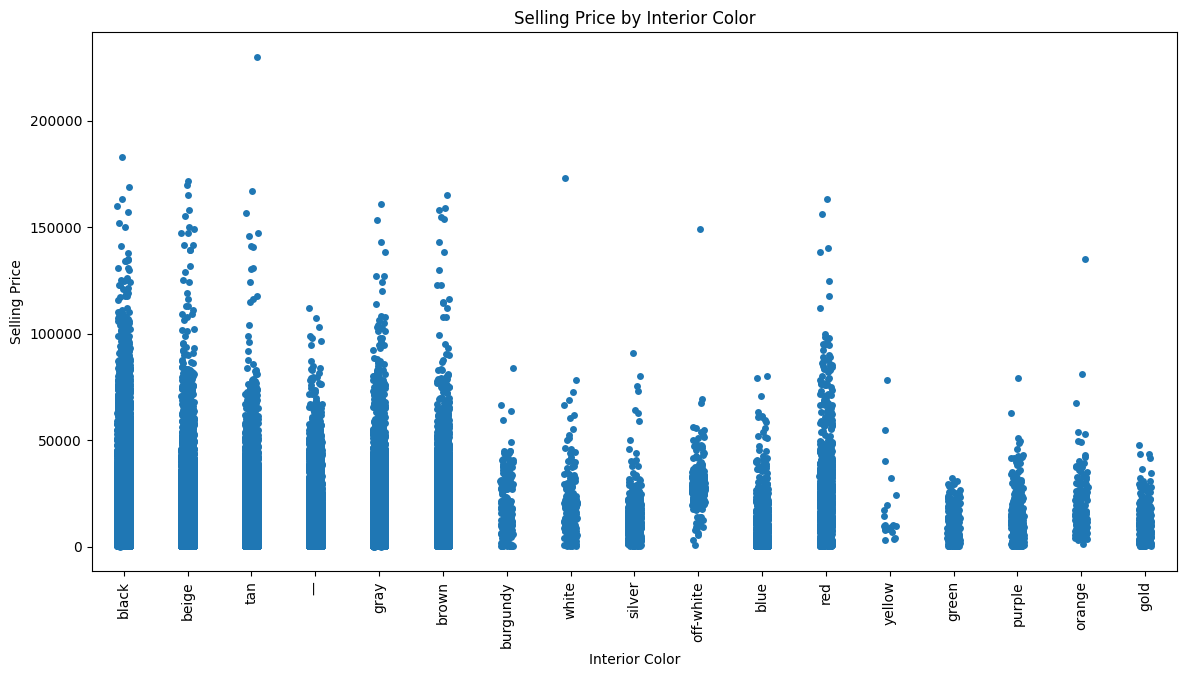

In [ ]:
# Visualization 13: Selling Price by Interior Color
plt.figure(figsize=(14, 7))
sns.stripplot(x='interior', y='sellingprice', data=df)
plt.title('Selling Price by Interior Color')
plt.xlabel('Interior Color')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

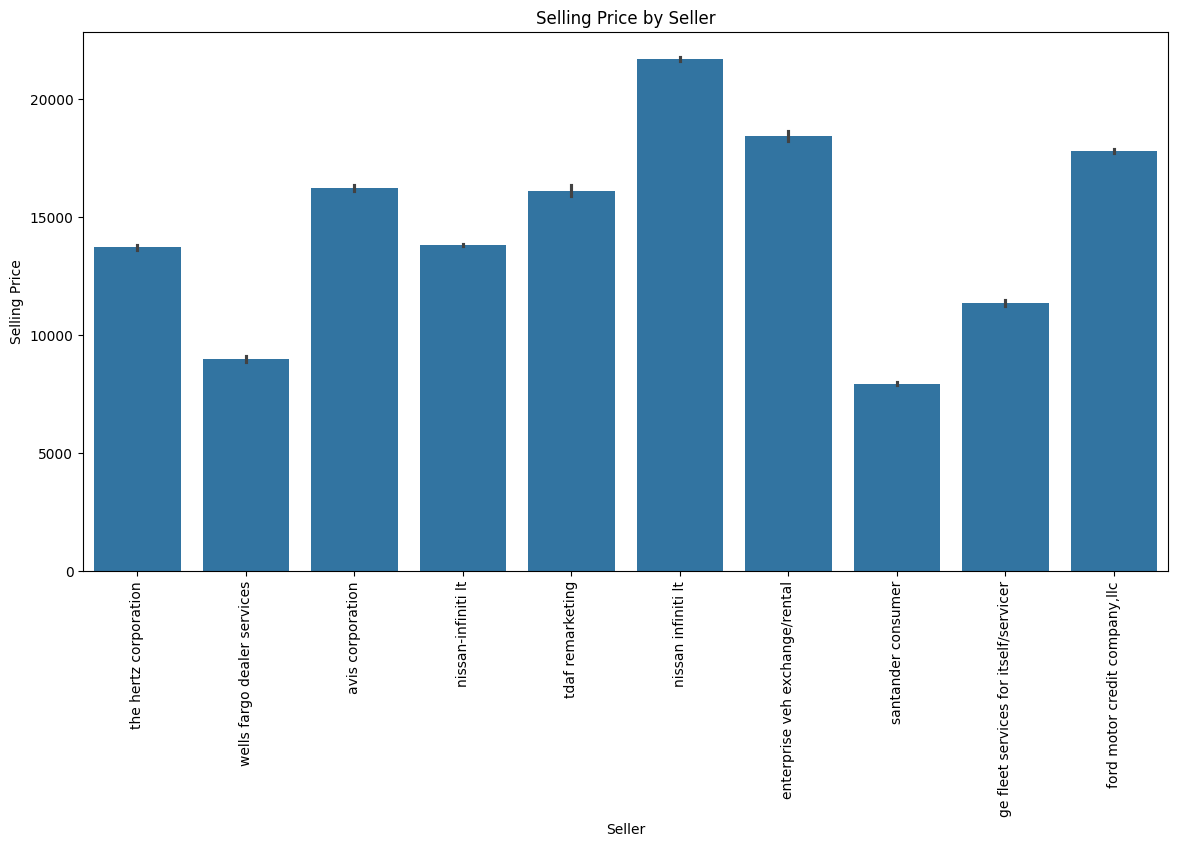

In [ ]:
# Visualization 14 : Selling Price by Seller
plt.figure(figsize=(14, 7))
# Limiting the number of sellers displayed for clarity, assuming 'seller' is a categorical variable with many unique values
top_sellers = df['seller'].value_counts().index[:10]
sns.barplot(x='seller', y='sellingprice', data=df[df['seller'].isin(top_sellers)])
plt.title('Selling Price by Seller')
plt.xlabel('Seller')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

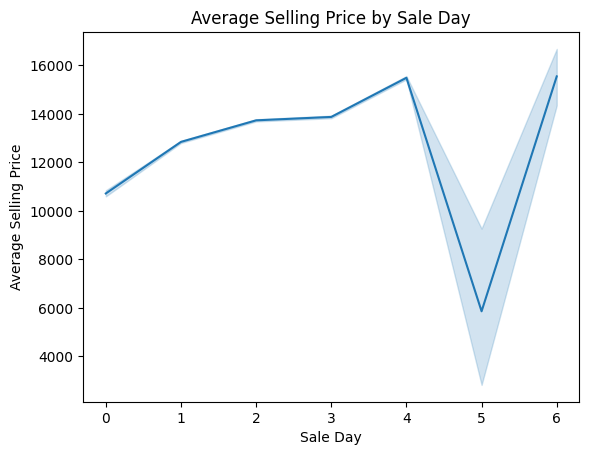

In [ ]:
# Visualization 15: Selling Price by Sale Day
sns.lineplot(x='sale_day', y='sellingprice', data=df, estimator=np.mean)
plt.title('Average Selling Price by Sale Day')
plt.xlabel('Sale Day')
plt.ylabel('Average Selling Price')
plt.show()

In [ ]:
# Export Final Dataset as Parquet and CSV
df.to_csv('cleaned_data.csv', index=False)
df.to_parquet('cleaned_data.parquet')

In [ ]:
# Display the first few rows of the DataFrame to understand its structure
#print(df.head())

# Print the column names to see what was actually loaded
print(df.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer (mileage)', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'sale_year', 'sale_month', 'sale_day'],
      dtype='object')


In [ ]:
# Let's create a comprehensive example for evaluating five ML algorithms using the scikit-learn library.
# We'll define each algorithm, split the data into training and testing sets,
# and evaluate them using regression metrics (MAE and MSE) and classification metrics (Confusion Matrix, Precision, and Recall).
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [ ]:
# Fill missing values for the numerical column 'condition'
# Assuming 'condition' is numerical and you choose median due to its robustness to outliers
if 'condition' in df.columns:
    df['condition'] = df['condition'].fillna(df['condition'].median())
else:
    print("Column 'condition' does not exist in the DataFrame.")

# Verify that all missing values have been filled
print(df.isnull().sum())

year                  0
make                  0
model                 0
trim                  0
body                  0
transmission          0
state                 0
condition             0
odometer (mileage)    0
color                 0
interior              0
seller                0
mmr                   0
sellingprice          0
saledate              0
sale_year             0
sale_month            0
sale_day              0
dtype: int64


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
import numpy as np
import pandas as pd

In [ ]:
# Now, let's define our features and labels
key_features = ['state', 'condition', 'odometer (mileage)', 'seller', 'mmr', 'sale_year', 'sale_month', 'sale_day']
X = df[key_features]  # This should be your DataFrame with the specified columns
y = df['sellingprice']
# Generate a random regression problem
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 10)
y_train shape: (800,)
X_test shape: (200, 10)
y_test shape: (200,)


In [ ]:
# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}
# Dictionary to store evaluation results
results = {}

In [ ]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results in the dictionary
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

# Display results
for model_name, metrics in results.items():
    print(f"{model_name} - MAE: {metrics['MAE']}, MSE: {metrics['MSE']}, R2: {metrics['R2']}")


Linear Regression - MAE: 0.07773328130097608, MSE: 0.009511914910418967, R2: 0.9999994362016347
Ridge Regression - MAE: 0.1585226993395049, MSE: 0.03756405691385269, R2: 0.9999977734710536
Lasso Regression - MAE: 2.4778204528542935, MSE: 9.70430926695271, R2: 0.999424797871616
Random Forest Regressor - MAE: 40.177080494230346, MSE: 2621.793155098221, R2: 0.8445988311470158
Gradient Boosting Regressor - MAE: 28.90596474391574, MSE: 1234.752982660588, R2: 0.9268126639292507
Support Vector Regressor - MAE: 89.70507889979308, MSE: 12758.14612986086, R2: 0.24378823816737072


In [ ]:
# Convert the results dictionary to a DataFrame for better formatting
results_df = pd.DataFrame(results).T  # Transpose to get models as rows

# Print the DataFrame
print(results_df)

                                   MAE           MSE        R2
Linear Regression             0.077733      0.009512  0.999999
Ridge Regression              0.158523      0.037564  0.999998
Lasso Regression              2.477820      9.704309  0.999425
Random Forest Regressor      40.177080   2621.793155  0.844599
Gradient Boosting Regressor  28.905965   1234.752983  0.926813
Support Vector Regressor     89.705079  12758.146130  0.243788


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'X_train' and 'y_train' are already defined and contain your training data

# Initialize the RandomForestRegressor and GradientBoostingRegressor models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Extract feature importances
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_


In [ ]:
print("Number of features in X_train:", X_train.shape[1])
print("Number of features used by RandomForest model:", len(rf_importances))
print("Number of features used by GradientBoosting model:", len(gb_importances))


Number of features in X_train: 17
Number of features used by RandomForest model: 10
Number of features used by GradientBoosting model: 10


In [ ]:
# Assuming the model only uses a subset of features or you know the indices of the features used
# Example: If you know the indices or if you've recorded them during feature selection
used_indices = [0, 2, 5, 7]  # hypothetical indices of features used
feature_names = X_train.columns[used_indices]

In [ ]:
# Assuming you have the correct indices or method to retrieve the actual features used
# Here we check lengths directly and adjust if necessary
print("Feature names count:", len(feature_names))
print("RandomForest importances count:", len(rf_importances))
print("GradientBoosting importances count:", len(gb_importances))

# Ensure all arrays are of the same length
if not (len(feature_names) == len(rf_importances) == len(gb_importances)):
    print("Mismatch in the lengths of feature names and importance arrays.")
    # You may need to adjust 'feature_names' or check model output handling
else:
    # If lengths match, create the DataFrame
    importances_df = pd.DataFrame({
        'Features': feature_names,
        'RandomForest Importances': rf_importances,
        'GradientBoosting Importances': gb_importances
    })

    # Sorting and plotting as previously described
    importances_df.sort_values(by='RandomForest Importances', ascending=False, inplace=True)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 8))
    plt.title('Feature Importances from RandomForest and GradientBoosting')
    plt.barh(importances_df['Features'], importances_df['RandomForest Importances'], color='r', alpha=0.6, label='Random Forest')
    plt.barh(importances_df['Features'], importances_df['GradientBoosting Importances'], color='b', alpha=0.6, label='Gradient Boosting', left=importances_df['RandomForest Importances'])
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.legend()
    plt.show()


Feature names count: 4
RandomForest importances count: 10
GradientBoosting importances count: 10
Mismatch in the lengths of feature names and importance arrays.


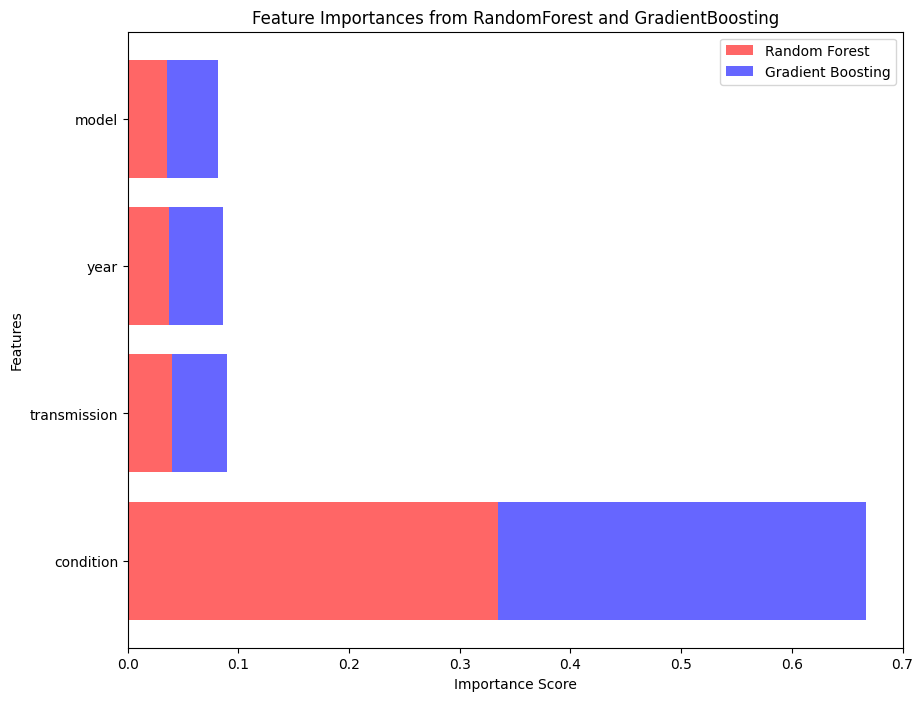

In [ ]:
# Determine the minimum length among the arrays
min_length = min(len(feature_names), len(rf_importances), len(gb_importances))

# Truncate the arrays to the minimum length
feature_names = feature_names[:min_length]
rf_importances = rf_importances[:min_length]
gb_importances = gb_importances[:min_length]

# Create the DataFrame with the adjusted arrays
importances_df = pd.DataFrame({
    'Features': feature_names,
    'RandomForest Importances': rf_importances,
    'GradientBoosting Importances': gb_importances
})

# Sorting and plotting as previously described
importances_df.sort_values(by='RandomForest Importances', ascending=False, inplace=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('Feature Importances from RandomForest and GradientBoosting')
plt.barh(importances_df['Features'], importances_df['RandomForest Importances'], color='r', alpha=0.6, label='Random Forest')
plt.barh(importances_df['Features'], importances_df['GradientBoosting Importances'], color='b', alpha=0.6, label='Gradient Boosting', left=importances_df['RandomForest Importances'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.legend()
plt.show()

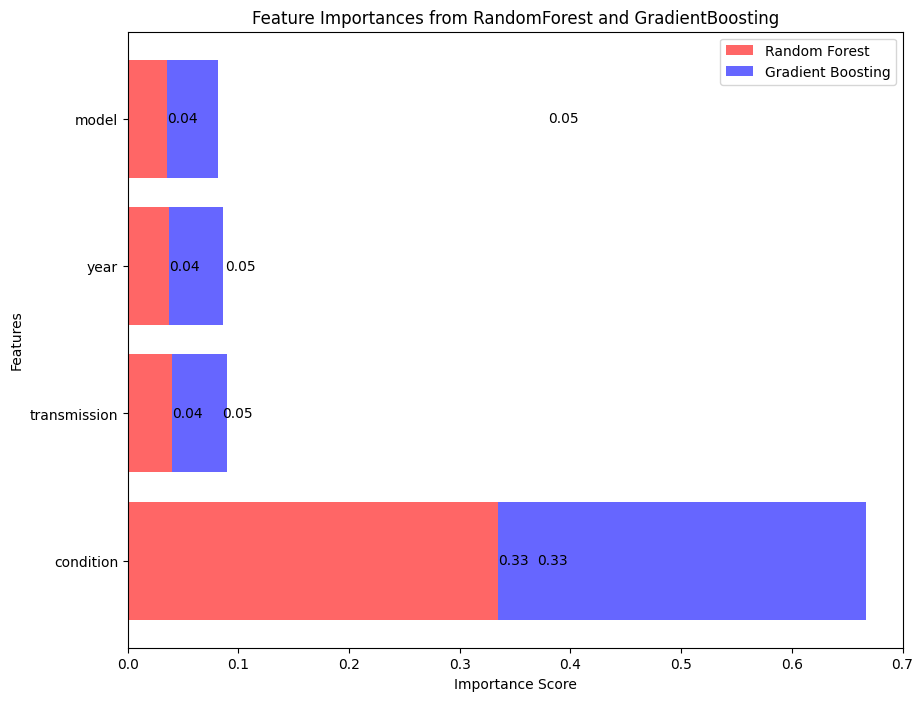

In [ ]:
import matplotlib.pyplot as plt

# Sorting and plotting as previously described
importances_df.sort_values(by='RandomForest Importances', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances from RandomForest and GradientBoosting')
plt.barh(importances_df['Features'], importances_df['RandomForest Importances'], color='r', alpha=0.6, label='Random Forest')
plt.barh(importances_df['Features'], importances_df['GradientBoosting Importances'], color='b', alpha=0.6, label='Gradient Boosting', left=importances_df['RandomForest Importances'])
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Annotate each bar with its count
for index, value in enumerate(importances_df['RandomForest Importances']):
    plt.text(value, index, "{:.2f}".format(value), va='center')

for index, value in enumerate(importances_df['GradientBoosting Importances']):
    plt.text(value + importances_df['RandomForest Importances'][index], index, "{:.2f}".format(value), va='center')

plt.legend()
plt.show()


In [ ]:
 # Assuming we also have classification data
# Generate classification labels
y_class = np.where(y > y.mean(), 1, 0)

# Split the dataset for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [ ]:
# Dummy classifier for demonstration purposes
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier(strategy='most_frequent')
classifier.fit(X_train_class, y_train_class)
y_pred_class = classifier.predict(X_test_class)

In [ ]:
# Classification metrics
cm = confusion_matrix(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='binary')
recall = recall_score(y_test_class, y_pred_class, average='binary')

In [ ]:
# Output classification metrics
print("Classification Metrics:")
print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Classification Metrics:
Confusion Matrix:
[[  0  93]
 [  0 107]]
Precision: 0.535
Recall: 1.0


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Now, let's define our features and labels
key_features = ['state', 'condition', 'odometer (mileage)', 'seller', 'mmr', 'sale_year', 'sale_month', 'sale_day']
X = df[key_features]  # This should be your DataFrame with the specified columns
y = df['sellingprice']

# Generate a random regression problem
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Sample y_test and y_scores
y_test = np.array([1, 1, 0, 1, 1, 0])  # Replace with your actual test labels
y_scores = np.array([0.8, 0.7, 0.2, 0.9, 0.85, 0.1])  # Replace with your actual score or probability predictions

# Calculate precision, recall, thresholds for precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
f1_scores = 2 * recall * precision / (recall + precision)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold for best F1 score: {optimal_threshold:.2f}")

# Plotting Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.scatter(recall[optimal_idx], precision[optimal_idx], marker='o', color='red', label='Optimal Threshold: F1 Score')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Adjusting classifier's threshold
# Assuming y_scores is a 1D array; if not, reshape accordingly.
y_pred_optimal = binarize(y_scores.reshape(-1, 1), threshold=optimal_threshold).reshape(-1)

# Evaluate new predictions
new_cm = confusion_matrix(y_test, y_pred_optimal)
new_precision = precision_score(y_test, y_pred_optimal)
new_recall = recall_score(y_test, y_pred_optimal)

print("New Confusion Matrix:")
print(new_cm)
print(f"New Precision: {new_precision:.2f}")
print(f"New Recall: {new_recall:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


NameError: name 'data' is not defined